<a href="https://colab.research.google.com/github/AarthiThirumavalavan/DL/blob/main/DM_scenario.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install deap

In [ ]:
#Asset list
# FEA = Fire Engine A
# FEB = Fire Engine B
# FFR = Fire Fast Response
# AMB = Ambulance
# MFR = Medical Fast Response
# PPC = Police Patrol Car 
# TPB = Traffic Police Bike

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#Asset at location A
asset_A = pd.DataFrame(
    {'Asset_name':['FEA', 'FEB', 'FFR', 'AMB', 'MFR', 'PPC', 'TPB'],
     'Qty' : [5, 2, 5, 2, 2, 3, 2],
     'Loc' : ['A', 'A', 'A', 'A', 'A', 'A', 'A']},
    columns=['Asset_name', 'Loc', 'Qty'])
asset_A

,Asset_name,Loc,Qty
0,FEA,A,5
1,FEB,A,2
2,FFR,A,5
3,AMB,A,2
4,MFR,A,2
5,PPC,A,3
6,TPB,A,2


In [ ]:
#Asset at location B
asset_B = pd.DataFrame(
    {'Asset_name':['FEA', 'FEB', 'FFR', 'AMB', 'MFR', 'PPC', 'TPB'],
     'Qty' : [2, 1, 3, 2, 2, 3, 2], 
     'Loc' : ['B', 'B', 'B', 'B', 'B', 'B', 'B']},
    columns=['Asset_name', 'Loc', 'Qty'])
asset_B

,Asset_name,Loc,Qty
0,FEA,B,2
1,FEB,B,1
2,FFR,B,3
3,AMB,B,2
4,MFR,B,2
5,PPC,B,3
6,TPB,B,2


In [ ]:
#Joining assets at loc A and loc B
assets = [asset_A, asset_B]
asset_list = pd.concat(assets)
asset_list

,Asset_name,Loc,Qty
0,FEA,A,5
1,FEB,A,2
2,FFR,A,5
3,AMB,A,2
4,MFR,A,2
5,PPC,A,3
6,TPB,A,2
0,FEA,B,2
1,FEB,B,1
2,FFR,B,3


In [ ]:
asset_list = asset_list.reset_index(drop=True)
asset_list

,Asset_name,Loc,Qty
0,FEA,A,5
1,FEB,A,2
2,FFR,A,5
3,AMB,A,2
4,MFR,A,2
5,PPC,A,3
6,TPB,A,2
7,FEA,B,2
8,FEB,B,1
9,FFR,B,3


In [ ]:
asset_list = asset_list.loc[asset_list.index.repeat(asset_list['Qty'])].assign(quantity=1).reset_index(drop=True)
asset_list

,Asset_name,Loc,Qty,quantity
0,FEA,A,5,1
1,FEA,A,5,1
2,FEA,A,5,1
3,FEA,A,5,1
4,FEA,A,5,1
5,FEB,A,2,1
6,FEB,A,2,1
7,FFR,A,5,1
8,FFR,A,5,1
9,FFR,A,5,1


In [ ]:
# Capability
# C1: Oil/Chemical/Electrical
# C2: Chemical/Electrical
# C3: Electrical
# C4: Injury-serious/Injury-light
# C5: Injury-Light
# C6: Robery/ Breakin/ Traffic accident/ Traffic control
# C7: Traffic accident/ Traffic control

In [ ]:
#Asset capability
asset_cap = pd.DataFrame(
    {'Asset_name':['FEA', 'FEB', 'FFR', 'AMB', 'MFR', 'PPC', 'TPB'],
     'Speed':[80, 90, 100, 80, 100, 100, 120],
     'Qty' : [5, 2, 5, 2, 2, 3, 2],
     'Capability': ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7'],
     'Prep_time': [5, 3, 2, 5, 2, 5, 2],
     'Effectiveness': ['S', 'S', 'C', 'CE', 'C', 'IAC', 'IC']},
    columns=['Asset_name', 'Speed', 'Qty', 'Capability', 'Prep_time', 'Effectiveness'])
asset_cap

,Asset_name,Speed,Qty,Capability,Prep_time,Effectiveness
0,FEA,80,5,C1,5,S
1,FEB,90,2,C2,3,S
2,FFR,100,5,C3,2,C
3,AMB,80,2,C4,5,CE
4,MFR,100,2,C5,2,C
5,PPC,100,3,C6,5,IAC
6,TPB,120,2,C7,2,IC


In [ ]:
#Merging Assets and asset capability
asset_assetcap = pd.merge(asset_list[['Asset_name', 'Loc' ]], asset_cap[['Asset_name', 'Speed', 'Capability', 'Prep_time', 'Effectiveness']], 'inner', on='Asset_name')
asset_assetcap

,Asset_name,Loc,Speed,Capability,Prep_time,Effectiveness
0,FEA,A,80,C1,5,S
1,FEA,A,80,C1,5,S
2,FEA,A,80,C1,5,S
3,FEA,A,80,C1,5,S
4,FEA,A,80,C1,5,S
5,FEA,B,80,C1,5,S
6,FEA,B,80,C1,5,S
7,FEB,A,90,C2,3,S
8,FEB,A,90,C2,3,S
9,FEB,B,90,C2,3,S


In [ ]:
# Target variables
# T1 -> Fire small/medium/large
# T2 -> Injury light/serious
# T3 -> Injury light
# T4 -> Crime serious/simple
# T5 -> Crime simple

In [ ]:
#Target allocation
target_alloc = pd.DataFrame(
    {'Asset_name':['FEA', 'FEB', 'FFR', 'AMB', 'MFR', 'PPC', 'TPB'],
     'Target':['T1', 'T1', 'T1', 'T2', 'T3', 'T4', 'T5']
     },
    columns=['Asset_name', 'Target'])
target_alloc

,Asset_name,Target
0,FEA,T1
1,FEB,T1
2,FFR,T1
3,AMB,T2
4,MFR,T3
5,PPC,T4
6,TPB,T5


In [ ]:
#Merging Asset, asset capability and target 
asset_cap_target = pd.merge(asset_assetcap, target_alloc, 'inner', on='Asset_name')
asset_cap_target

,Asset_name,Loc,Speed,Capability,Prep_time,Effectiveness,Target
0,FEA,A,80,C1,5,S,T1
1,FEA,A,80,C1,5,S,T1
2,FEA,A,80,C1,5,S,T1
3,FEA,A,80,C1,5,S,T1
4,FEA,A,80,C1,5,S,T1
5,FEA,B,80,C1,5,S,T1
6,FEA,B,80,C1,5,S,T1
7,FEB,A,90,C2,3,S,T1
8,FEB,A,90,C2,3,S,T1
9,FEB,B,90,C2,3,S,T1


In [ ]:
asset_cap_target.reset_index(inplace=True)
asset_cap_target = asset_cap_target.rename(columns = {'index':'Asset_num'})
asset_cap_target

,Asset_num,Asset_name,Loc,Speed,Capability,Prep_time,Effectiveness,Target
0,0,FEA,A,80,C1,5,S,T1
1,1,FEA,A,80,C1,5,S,T1
2,2,FEA,A,80,C1,5,S,T1
3,3,FEA,A,80,C1,5,S,T1
4,4,FEA,A,80,C1,5,S,T1
5,5,FEA,B,80,C1,5,S,T1
6,6,FEA,B,80,C1,5,S,T1
7,7,FEB,A,90,C2,3,S,T1
8,8,FEB,A,90,C2,3,S,T1
9,9,FEB,B,90,C2,3,S,T1


In [ ]:
dist_A = 20
dist_B = 10

def myfunc(row):
    if row['Loc'] == 'A':
        return round((dist_A / row['Speed'])*60, 2)
    elif row['Loc'] == 'B':
        return round((dist_B / row['Speed'])*60, 2)

asset_cap_target['Time'] = asset_cap_target.apply(lambda x : myfunc(x), axis=1)


In [ ]:
asset_cap_target

,Asset_num,Asset_name,Loc,Speed,Capability,Prep_time,Effectiveness,Target,Time
0,0,FEA,A,80,C1,5,S,T1,15.00
1,1,FEA,A,80,C1,5,S,T1,15.00
2,2,FEA,A,80,C1,5,S,T1,15.00
3,3,FEA,A,80,C1,5,S,T1,15.00
4,4,FEA,A,80,C1,5,S,T1,15.00
5,5,FEA,B,80,C1,5,S,T1,7.50
6,6,FEA,B,80,C1,5,S,T1,7.50
7,7,FEB,A,90,C2,3,S,T1,13.33
8,8,FEB,A,90,C2,3,S,T1,13.33
9,9,FEB,B,90,C2,3,S,T1,6.67


In [ ]:
asset_cap_target['Total_time'] = asset_cap_target['Time'] + asset_cap_target['Prep_time']

In [ ]:
asset_list = asset_cap_target.values.tolist()
asset_list

[[0, 'FEA', 'A', 80, 'C1', 5, 'S', 'T1', 15.0, 20.0],
 [1, 'FEA', 'A', 80, 'C1', 5, 'S', 'T1', 15.0, 20.0],
 [2, 'FEA', 'A', 80, 'C1', 5, 'S', 'T1', 15.0, 20.0],
 [3, 'FEA', 'A', 80, 'C1', 5, 'S', 'T1', 15.0, 20.0],
 [4, 'FEA', 'A', 80, 'C1', 5, 'S', 'T1', 15.0, 20.0],
 [5, 'FEA', 'B', 80, 'C1', 5, 'S', 'T1', 7.5, 12.5],
 [6, 'FEA', 'B', 80, 'C1', 5, 'S', 'T1', 7.5, 12.5],
 [7, 'FEB', 'A', 90, 'C2', 3, 'S', 'T1', 13.33, 16.33],
 [8, 'FEB', 'A', 90, 'C2', 3, 'S', 'T1', 13.33, 16.33],
 [9, 'FEB', 'B', 90, 'C2', 3, 'S', 'T1', 6.67, 9.67],
 [10, 'FFR', 'A', 100, 'C3', 2, 'C', 'T1', 12.0, 14.0],
 [11, 'FFR', 'A', 100, 'C3', 2, 'C', 'T1', 12.0, 14.0],
 [12, 'FFR', 'A', 100, 'C3', 2, 'C', 'T1', 12.0, 14.0],
 [13, 'FFR', 'A', 100, 'C3', 2, 'C', 'T1', 12.0, 14.0],
 [14, 'FFR', 'A', 100, 'C3', 2, 'C', 'T1', 12.0, 14.0],
 [15, 'FFR', 'B', 100, 'C3', 2, 'C', 'T1', 6.0, 8.0],
 [16, 'FFR', 'B', 100, 'C3', 2, 'C', 'T1', 6.0, 8.0],
 [17, 'FFR', 'B', 100, 'C3', 2, 'C', 'T1', 6.0, 8.0],
 [18, 'AMB', 'A'

In [ ]:
# Target situation
# FS -> Fire small
# FM -> Fire medium
# FL -> Fire large
# IL -> Injury light
# IS -> Injury serious
# CS -> Crime simple
# CSS -> Crime serious

In [ ]:
#Target situation
target_situation = pd.DataFrame(
    {'Target_inc':['FS', 'FM', 'FL', 'FS', 'FM', 'FL', 'FS', 'FM', 'FL', 'IL', 'IS', 'IL', 'CS', 'CSS', 'CS'],
     'Asset_name':['FEA', 'FEA', 'FEA', 'FEB', 'FEB', 'FEB', 'FRC', 'FRC', 'FRC', 'AMB', 'AMB', 'MFR', 'PPC', 'PPC', 'TPB'],
     'Qty_req' : [1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 1, 1, 1, 2, 1]
     },
    columns=['Target_inc', 'Asset_name', 'Qty_req'])
target_situation

,Target_inc,Asset_name,Qty_req
0,FS,FEA,1
1,FM,FEA,2
2,FL,FEA,3
3,FS,FEB,1
4,FM,FEB,2
5,FL,FEB,3
6,FS,FRC,1
7,FM,FRC,2
8,FL,FRC,3
9,IL,AMB,1


In [ ]:
target_list = target_situation.values.tolist()
target_list

[['FS', 'FEA', 1],
 ['FM', 'FEA', 2],
 ['FL', 'FEA', 3],
 ['FS', 'FEB', 1],
 ['FM', 'FEB', 2],
 ['FL', 'FEB', 3],
 ['FS', 'FRC', 1],
 ['FM', 'FRC', 2],
 ['FL', 'FRC', 3],
 ['IL', 'AMB', 1],
 ['IS', 'AMB', 1],
 ['IL', 'MFR', 1],
 ['CS', 'PPC', 1],
 ['CSS', 'PPC', 2],
 ['CS', 'TPB', 1]]

In [ ]:
#Incident info
incident = ['Oil', 'Traffic']
task = ['C1', 'S']
est_time = [10, 15]
intensity = ['medium']
req_asset = ['PPC', 1]
effect = "IAC"
injury = 0

In [ ]:
# aList = [random.randint(0,1) for x in range(36)]
# aList = np.array(aList)

In [ ]:
asset_list

[[0, 'FEA', 'A', 80, 'C1', 5, 'S', 'T1', 15.0, 20.0],
 [1, 'FEA', 'A', 80, 'C1', 5, 'S', 'T1', 15.0, 20.0],
 [2, 'FEA', 'A', 80, 'C1', 5, 'S', 'T1', 15.0, 20.0],
 [3, 'FEA', 'A', 80, 'C1', 5, 'S', 'T1', 15.0, 20.0],
 [4, 'FEA', 'A', 80, 'C1', 5, 'S', 'T1', 15.0, 20.0],
 [5, 'FEA', 'B', 80, 'C1', 5, 'S', 'T1', 7.5, 12.5],
 [6, 'FEA', 'B', 80, 'C1', 5, 'S', 'T1', 7.5, 12.5],
 [7, 'FEB', 'A', 90, 'C2', 3, 'S', 'T1', 13.33, 16.33],
 [8, 'FEB', 'A', 90, 'C2', 3, 'S', 'T1', 13.33, 16.33],
 [9, 'FEB', 'B', 90, 'C2', 3, 'S', 'T1', 6.67, 9.67],
 [10, 'FFR', 'A', 100, 'C3', 2, 'C', 'T1', 12.0, 14.0],
 [11, 'FFR', 'A', 100, 'C3', 2, 'C', 'T1', 12.0, 14.0],
 [12, 'FFR', 'A', 100, 'C3', 2, 'C', 'T1', 12.0, 14.0],
 [13, 'FFR', 'A', 100, 'C3', 2, 'C', 'T1', 12.0, 14.0],
 [14, 'FFR', 'A', 100, 'C3', 2, 'C', 'T1', 12.0, 14.0],
 [15, 'FFR', 'B', 100, 'C3', 2, 'C', 'T1', 6.0, 8.0],
 [16, 'FFR', 'B', 100, 'C3', 2, 'C', 'T1', 6.0, 8.0],
 [17, 'FFR', 'B', 100, 'C3', 2, 'C', 'T1', 6.0, 8.0],
 [18, 'AMB', 'A'

In [ ]:
asset_list[0]

[0, 'FEA', 'A', 80, 'C1', 5, 'S', 'T1', 15.0, 20.0]

In [ ]:
#Fire asset for scenario 1
fire_asset = []
for i,v in enumerate(asset_list, 1):
    if v[4] == task[0] and v[6] == task[1]:
        fire_asset.append(v[0])
fire_asset

[0, 1, 2, 3, 4, 5, 6]

In [ ]:
#Traffic asset for scenario 1
traffic_asset = []
for i, v in enumerate(asset_list, 1):
  if v[1] == req_asset[0] and v[6] == effect:
    traffic_asset.append(v[0])
traffic_asset

[26, 27, 28, 29, 30, 31]

In [ ]:
def wrong_asset_allocation(aList):
  
  aList = np.array(aList)
  deployedAssetIdx = np.where(aList==1)[0]
  violation = 0
  counter = 0

  for idx in deployedAssetIdx:
    if idx in fire_asset:
      counter+= 1
    else:
      violation+= 1

  return violation

In [ ]:
def wrong_asset_allocation_T(aList):
  
  aList = np.array(aList)
  deployedAssetIdx = np.where(aList==1)[0]
  violation = 0
  counter = 0

  for idx in deployedAssetIdx:
    if idx in traffic_asset:
      counter+= 1
    else:
      violation+= 1

  return violation

In [ ]:
fire_asset

[0, 1, 2, 3, 4, 5, 6]

In [ ]:
def num_asset_allocation(aList):

  aList = np.array(aList)
  deployedAssetIdx = np.where(aList==1)[0]
  violation = 0
  counter = 0

  for idx in deployedAssetIdx:
    if idx in fire_asset:
      counter+= 1

  for i,v in enumerate(target_list, 1):     
    if v[0] == "FM":
      target_qty = v[2]
  
  if counter < target_qty:
    violation+= (target_qty - counter)

  return violation*2

In [ ]:
def num_asset_allocation_T(aList):

  aList = np.array(aList)
  deployedAssetIdx = np.where(aList==1)[0]
  violation = 0
  counter = 0

  for idx in deployedAssetIdx:
    # print("idx: ",idx)
    if idx in traffic_asset:
      counter+= 1

  # for i,v in enumerate(target_list, 1):     
  #   if v[0] in ['CS', 'CSS'] and v[1] == 'PPC':
  target_qty = 1
  
  if counter != target_qty:
    violation+= abs(target_qty - counter)
  # print("violation:",violation)
  return violation*2

In [ ]:
def exceed_asset_alloc(aList):

  aList = np.array(aList)
  deployedAssetIdx = np.where(aList==1)[0]
  violation = 0
  counter = 0

  for idx in deployedAssetIdx:
    if idx in fire_asset:
      counter+= 1

  for i,v in enumerate(target_list, 1):    
    if v[0] == "FM":
      target_qty = v[2]
  
  if counter > target_qty:
    violation+= (counter - target_qty)

  return violation

In [ ]:
# def exceed_asset_alloc_T(aList):

#   aList = np.array(aList)
#   deployedAssetIdx = np.where(aList==1)[0]
#   violation = 0
#   counter = 0

#   for idx in deployedAssetIdx:
#     if idx in fire_asset:
#       counter+= 1

#   # for i,v in enumerate(target_list, 1):    
#   #   if v[0] in ['CS', 'CSS'] and v[1] == 'PPC':
#   #     target_qty = v[2]
#   target_qty = 1
#   if counter != target_qty:
#     violation+= abs(counter - target_qty)

#   return violation

In [ ]:
asset_list[0][9]

20.0

In [ ]:
def time_taken(aList):

  aList = np.array(aList)
  deployedAssetIdx = np.where(aList==1)[0]
  violation = 0
  time = []
  
  if any(deployedAssetIdx):
    for idx in deployedAssetIdx:
      time.append(asset_list[idx][9])
    if max(time) > 15:
      violation = (max(time) - 15)
    else:
      violation = 0

  return violation

In [ ]:
# aList = [random.randint(0,1) for x in range(36)]
# aList = np.array(aList)
# time = []
# deployedAssetIdx = np.where(aList==1)[0]
# deployedAssetIdx
# # if any(deployedAssetIdx):
# #   print("hi")
# # else:
# #   print("hello")
# for idx in deployedAssetIdx:
#   time.append(asset_list[idx][9])
# print(time)
# violation = abs(max(time) - 15)
# print(violation)

In [ ]:
# def time_taken_T(aList):

#   aList = np.array(aList)
#   deployedAssetIdx = np.where(aList==1)[0]
#   violation = 0
#   time = 0

#   for idx in deployedAssetIdx:
#     time+= asset_list[idx][9]

#   if time > 15:
#     violation = abs(time - 15)
#   else:
#     pass

#   return violation


In [ ]:
def getCost(aList):
  wrong_asset_alloc_cost = wrong_asset_allocation(aList)
  num_asset_alloc_cost = num_asset_allocation(aList)
  exceed_asset_alloc_cost = exceed_asset_alloc(aList)
  time_taken_cost = time_taken(aList)

  wrong_asset_alloc_cost_T = wrong_asset_allocation_T(aList)
  # print(wrong_asset_alloc_cost_T)
  num_asset_alloc_cost_T = num_asset_allocation_T(aList)
  # print(num_asset_alloc_cost_T)
  # exceed_asset_alloc_cost_T = exceed_asset_alloc_T(aList)
  #time_taken_cost_T = time_taken_T(aList)

  soft_constraint_violation_f = exceed_asset_alloc_cost + time_taken_cost  
  #soft_constraint_violation_t = exceed_asset_alloc_cost_T #+ time_taken_cost_T
  hard_constraint_violation_f = wrong_asset_alloc_cost + num_asset_alloc_cost
  hard_constraint_violation_t = wrong_asset_alloc_cost_T + num_asset_alloc_cost_T

  soft_constraint_violation = soft_constraint_violation_f #+ soft_constraint_violation_t
  hard_constraint_violation = hard_constraint_violation_f + (hard_constraint_violation_t)
  return (HARD_CONSTRAINT_PENALTY * hard_constraint_violation) + soft_constraint_violation

In [ ]:
#Elitism
from deap import tools
from deap import algorithms

def eaSimpleWithElitism(
    population,
    toolbox,
    cxpb,
    mutpb,
    ngen,
    stats=None,
    halloffame=None,
    verbose=__debug__,
):
    """This algorithm is similar to DEAP eaSimple() algorithm, with the modification that
    halloffame is used to implement an elitism mechanism. The individuals contained in the
    halloffame are directly injected into the next generation and are not subject to the
    genetic operators of selection, crossover and mutation.
    """
    logbook = tools.Logbook()
    logbook.header = ["gen", "nevals"] + (stats.fields if stats else [])

    # Evaluate the individuals with an invalid fitness
    invalid_ind = [ind for ind in population if not ind.fitness.valid]
    fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    if halloffame is None:
        raise ValueError("halloffame parameter must not be empty!")

    halloffame.update(population)
    hof_size = len(halloffame.items) if halloffame.items else 0

    record = stats.compile(population) if stats else {}
    logbook.record(gen=0, nevals=len(invalid_ind), **record)
    if verbose:
        print(logbook.stream)

    # Begin the generational process
    for gen in range(1, ngen + 1):

        # Select the next generation individuals
        offspring = toolbox.select(population, len(population) - hof_size)

        # Vary the pool of individuals
        offspring = algorithms.varAnd(offspring, toolbox, cxpb, mutpb)

        # Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        # add the best back to population:
        offspring.extend(halloffame.items)

        # Update the hall of fame with the generated individuals
        halloffame.update(offspring)

        # Replace the current population by the offspring
        population[:] = offspring

        # Append the current generation statistics to the logbook
        record = stats.compile(population) if stats else {}
        logbook.record(gen=gen, nevals=len(invalid_ind), **record)
        if verbose:
            print(logbook.stream)

    return population, logbook

In [ ]:
from deap import base, creator, tools, algorithms
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import elitism

# problem constants:
HARD_CONSTRAINT_PENALTY = 10  # the penalty factor for a hard-constraint violation

RANDOM_SEED = 33
random.seed(RANDOM_SEED)

In [ ]:
# define a single objective, maximizing fitness strategy:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))

# create the Individual class based on list:
creator.create("Individual", list, fitness=creator.FitnessMin)

In [ ]:
toolbox = base.Toolbox()

nsp_length = len(asset_list)#36 assets

# create an operator that randomly returns 0 or 1:
toolbox.register("zeroOrOne", random.randint, 0, 1)
# create the individual operator to fill up an Individual instance:
toolbox.register("individualCreator", tools.initRepeat, creator.Individual, toolbox.zeroOrOne, nsp_length)
# create the population operator to generate a list of individuals:
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)

In [ ]:
# fitness calculation
def fitness_func(individual):
    return getCost(individual),  # return a tuple

toolbox.register("evaluate", fitness_func)

In [ ]:
# genetic operators:
toolbox.register("select", tools.selTournament, tournsize=2)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=1.0/nsp_length)

In [ ]:
# Genetic Algorithm constants:
POPULATION_SIZE = 300
P_CROSSOVER = 0.9  # probability for crossover
P_MUTATION = 0.1   # probability for mutating an individual
MAX_GENERATIONS = 200
HALL_OF_FAME_SIZE = 30

In [ ]:
population = toolbox.populationCreator(n=POPULATION_SIZE)

# prepare the statistics object:
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("min", np.min)
stats.register("avg", np.mean)

In [ ]:
# define the hall-of-fame object:
hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

population, logbook = eaSimpleWithElitism(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION,
                                              ngen=MAX_GENERATIONS, stats=stats, halloffame=hof, verbose=True)

gen	nevals	min	avg    
0  	300   	166	342.563
1  	239   	155	300.58 
2  	247   	115	257.24 
3  	246   	106	218.609
4  	239   	105	189.916
5  	244   	92 	166.566
6  	240   	70 	145.323
7  	245   	55 	125.67 
8  	227   	55 	105.852
9  	254   	35 	91.6966
10 	241   	32 	79.2211
11 	250   	32 	69.9444
12 	250   	30 	61.3977
13 	247   	30 	54.9222
14 	241   	30 	48.2   
15 	246   	30 	42.6155
16 	226   	30 	38.9133
17 	250   	30 	37.3433
18 	235   	30 	37.16  
19 	241   	30 	36.1111
20 	246   	30 	36.4433
21 	234   	30 	35.1211
22 	243   	30 	35.0244
23 	253   	30 	34.1567
24 	248   	30 	34.1978
25 	238   	30 	34.2222
26 	254   	30 	33.45  
27 	243   	30 	32.8311
28 	254   	30 	33.5133
29 	252   	30 	32.2533
30 	243   	30 	32.81  
31 	246   	30 	33.8711
32 	248   	30 	33.1178
33 	245   	30 	33.0278
34 	241   	30 	33.45  
35 	241   	30 	34.0233
36 	251   	30 	32.3933
37 	236   	30 	32.7533
38 	241   	30 	33.2555
39 	254   	30 	33.2255
40 	242   	30 	33.6678
41 	247   	30 	33.9289
42 	243   	

In [ ]:
# print best solution found:
best = hof.items[0]
print(len(best))
print("-- Best Individual = ", best)
print("-- Best Fitness = ", best.fitness.values[0])

36
-- Best Individual =  [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
-- Best Fitness =  30.0


In [ ]:
for i in range(len(best)):
  if best[i] == 1:
    print(asset_list[i])

[5, 'FEA', 'B', 80, 'C1', 5, 'S', 'T1', 7.5, 12.5]
[6, 'FEA', 'B', 80, 'C1', 5, 'S', 'T1', 7.5, 12.5]
[31, 'PPC', 'B', 100, 'C6', 5, 'IAC', 'T4', 6.0, 11.0]


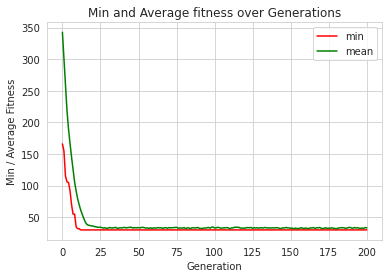

In [ ]:
# extract statistics:
minFitnessValues, meanFitnessValues = logbook.select("min", "avg")

# plot statistics:
sns.set_style("whitegrid")
plt.plot(minFitnessValues, color='red', label='min')
plt.plot(meanFitnessValues, color='green', label='mean')
plt.xlabel('Generation')
plt.ylabel('Min / Average Fitness')
plt.title('Min and Average fitness over Generations')
plt.legend()
plt.show()